In [1251]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

In [1252]:
data = pd.read_csv('C:\\Users\\Deepak\\Downloads\\WineQualityRed.csv')

In [1253]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [1254]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [1255]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [1256]:
reviews = []
for i in data['quality']:
    if i >= 1 and i <= 2:
        reviews.append('1')
    elif i >= 3 and i <= 4:
        reviews.append('2')
    elif i >= 5 and i <= 6:
        reviews.append('3')
    elif i >= 7 and i <= 8:
        reviews.append('4')
    elif i >= 9 and i <= 10:
        reviews.append('5')
data['Reviews'] = reviews
data['Reviews'] = data['Reviews'].astype(int)

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Reviews
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,3
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,3
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,3


In [1257]:
# Now ignoring Quality feature, since we have Reviews
X = data.iloc[:, 0:-2]
y = data.iloc[:, -1]

In [1258]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [1259]:
y.head()

0    3
1    3
2    3
3    3
4    3
Name: Reviews, dtype: int32

In [1260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

In [1261]:
# Initial score check with some value of k
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8395833333333333

### Now using cross Validation to gain some confidence 

In [1262]:
neighbours = np.arange(1,21)

In [1263]:
neighbours

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [1264]:
scores_old = np.empty(len(neighbours))
for i in neighbours:
    knn = KNeighborsClassifier(n_neighbors = i)
    scores_old[i-1] = np.mean(cross_val_score(knn, X, y, cv=10, scoring='accuracy'))

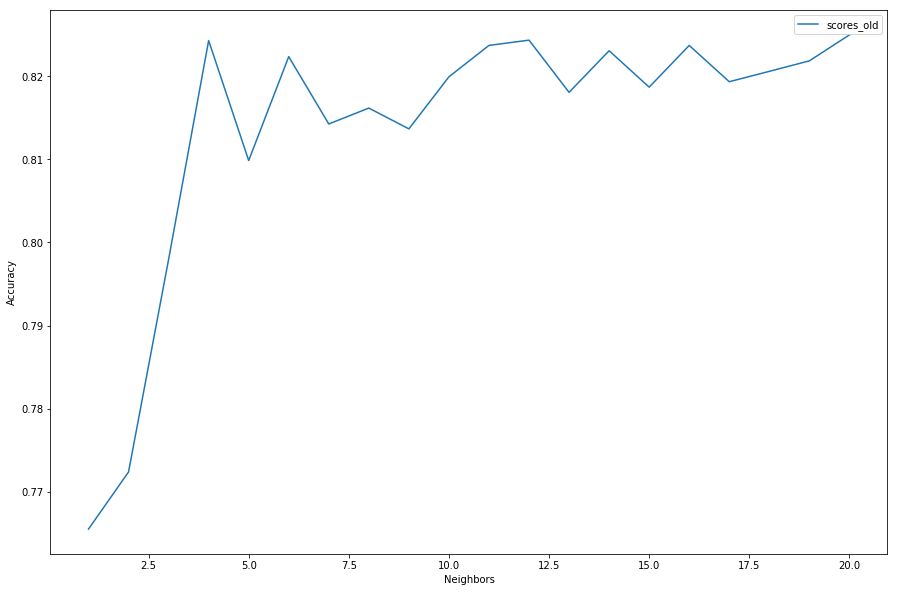

In [1265]:
plt.figure(figsize=(15, 10))
plt.plot(neighbours, train_scores_old, label = 'scores_old')
plt.legend()
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.show()

### Variance of 2 features is higher than other, Standardizing the features

In [1266]:
data.var()

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
Reviews                    0.165938
dtype: float64

In [1267]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
ss = StandardScaler()
data[cols] = pd.DataFrame(ss.fit_transform(data[cols]), columns = data[cols].columns)
data.var()

fixed acidity           1.000626
volatile acidity        1.000626
citric acid             1.000626
residual sugar          1.000626
chlorides               1.000626
free sulfur dioxide     1.000626
total sulfur dioxide    1.000626
density                 1.000626
pH                      1.000626
sulphates               1.000626
alcohol                 1.000626
quality                 0.652168
Reviews                 0.165938
dtype: float64

In [1268]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Reviews
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5,3
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5,3
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5,3
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6,3
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5,3


In [1269]:
X = data.iloc[:, 0:-2]
y = data.iloc[:, -1]

In [1270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

In [1271]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8166666666666667

In [1272]:
scores_new = np.empty(len(neighbours))
for i in neighbours:
    knn = KNeighborsClassifier(n_neighbors = i)
    scores_new[i-1] = np.mean(cross_val_score(knn, X, y, cv=10, scoring='accuracy'))

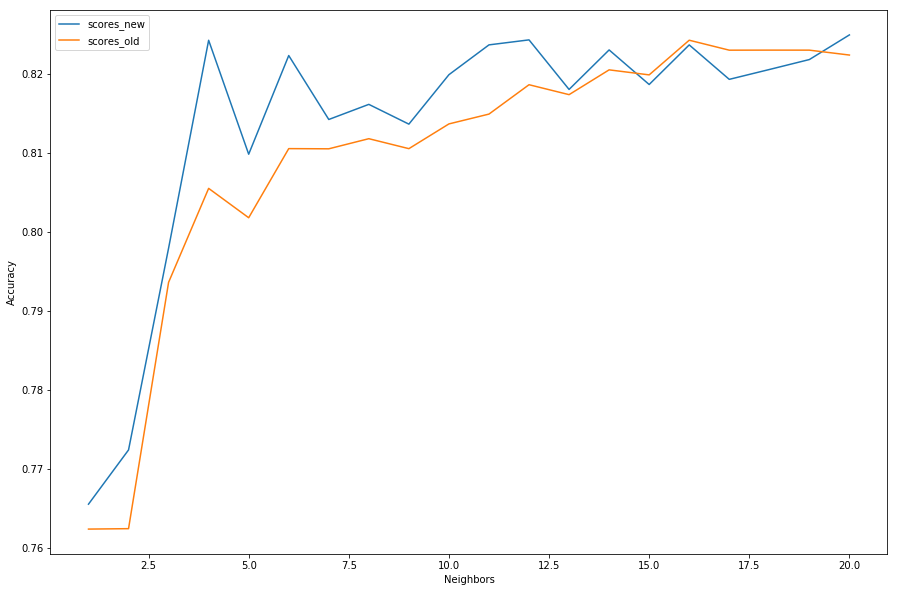

In [1273]:
plt.figure(figsize=(15, 10))
plt.plot(neighbours, scores_new, label = 'scores_new')
plt.plot(neighbours, scores_old, label = 'scores_old')
plt.legend()
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.show()

Just because of feature scaling, above improvement can been seen clearly

In [1274]:
pca = PCA()
X_pca = pca.fit_transform(X)
print(np.cumsum(pca.explained_variance_ratio_))

[0.28173931 0.45682201 0.59778051 0.70807438 0.79528275 0.85524714
 0.90831906 0.94676967 0.97810077 0.99458561 1.        ]


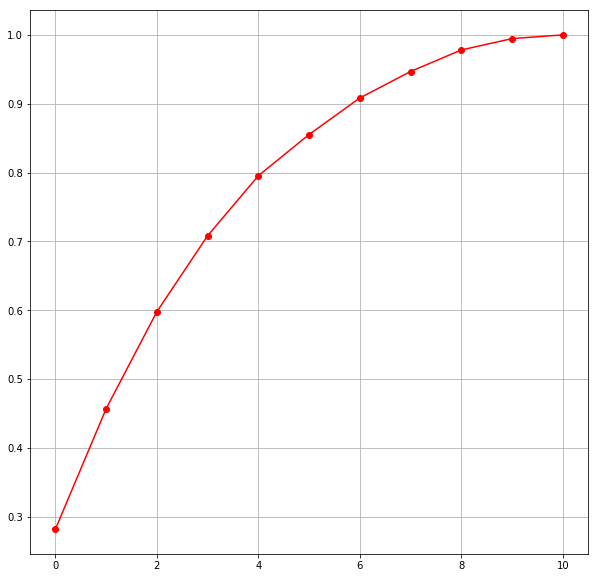

In [1275]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()
plt.show()

In [1276]:
# If we consider only 2 components, then they can explain only 45% variance, hence will not result into a good model
# Considering all the features is not giving us the best model, we have seen this in the previous cells
# Setting components to 6, 7 or 8 giving good results
pca = PCA(n_components = 6)
x_pca = pca.fit_transform(X)

In [1277]:
scores_final = np.empty(len(neighbours))
for i in neighbours:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    scores_final[i-1] = np.mean(cross_val_score(knn, x_pca, y, cv=10, scoring='accuracy'))

In [1278]:
scores_final

array([0.77667581, 0.76104251, 0.79040655, 0.81553657, 0.81171949,
       0.8217903 , 0.82618486, 0.83309543, 0.8268218 , 0.82995461,
       0.82620471, 0.82620083, 0.82056011, 0.82619302, 0.8211654 ,
       0.8267789 , 0.82178269, 0.82679463, 0.82429084, 0.82742375])

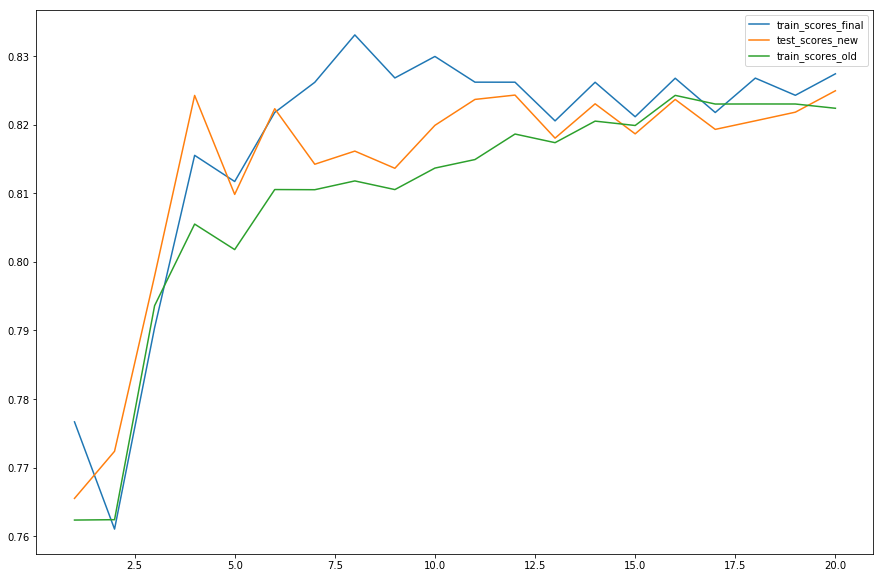

In [1279]:
plt.figure(figsize=(15, 10))
plt.plot(neighbours, scores_final, label = 'train_scores_final')
plt.plot(neighbours, scores_new, label = 'test_scores_new')
plt.plot(neighbours, scores_old, label = 'train_scores_old')
plt.legend()
plt.show()

In [1280]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
print(np.mean(cross_val_score(knn, x_pca, y, cv=10, scoring='accuracy')))

0.8166666666666667
0.8330954327972661
